In [142]:
# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [149]:
# Load data and select relevant columns
columns = [
    'home_outcome_D', 'home_outcome_L', 'home_outcome_W',
    'avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win',
    'home_ranking', 'away_ranking',
    'home_season_wins_so_far', 'home_season_draws_so_far', 'home_season_losses_so_far'
]

df = pd.read_csv('../data/cleaned-premier-onehot.csv')
df = df[columns]
df


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far
0,0,1,0,7.024,3.303,3.748,18,17,0,0,0
1,1,0,0,6.697,4.338,8.967,1,8,0,0,0
2,1,0,0,6.842,3.514,4.852,11,19,0,0,0
3,0,0,1,7.000,3.207,3.742,14,16,0,0,0
4,0,0,1,6.477,3.651,5.318,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0,1,6.619,8.266,8.563,4,18,17,2,0
1242,0,1,0,6.563,8.631,8.438,2,19,17,8,9
1243,1,0,0,6.204,7.470,6.521,17,16,9,10,14
1244,1,0,0,6.153,6.795,3.233,3,8,20,2,11


In [150]:
# See the shape and size 
df.shape

(1246, 11)

In [151]:
# See how it looks (get the first 10 records)
df.sample(10)

,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far
195,0,0,1,6.834,3.317,4.123,18,19,4,6,11
163,0,0,1,7.419,3.168,4.034,8,13,4,4,8
194,1,0,0,8.039,3.351,2.357,17,14,7,9,3
70,1,0,0,7.607,3.355,2.457,16,12,0,2,4
1143,0,0,1,6.123,6.637,2.957,14,8,9,7,8
138,1,0,0,7.056,3.301,3.520,11,10,2,5,7
663,0,0,1,6.255,2.998,2.965,20,10,0,0,2
256,0,1,0,6.932,4.568,8.455,3,8,8,4,9
995,0,0,1,6.419,7.557,6.585,2,10,3,2,2
1152,0,0,1,5.873,6.447,4.528,10,16,5,6,11


In [152]:
# See how many home results are included and how the records per home_outcome are distributed
# Group by home_outcome attribute


outcome_counts = pd.Series({
    'W': df['home_outcome_W'].sum(),
    'D': df['home_outcome_D'].sum(),
    'L': df['home_outcome_L'].sum()
})

print(outcome_counts)


W    545
D    322
L    379
dtype: int64


In [154]:
# Have the descriptive statistics calculated for the whole dataset
df.describe()

,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,0.258427,0.304173,0.437400,7.274838,4.441469,3.684693,11.113162,10.462279,5.401284,4.509631,5.774478
std,0.437946,0.460241,0.496265,1.043937,1.647506,1.604586,5.540870,5.692081,4.181174,2.974238,4.374224
min,0.000000,0.000000,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,7.056000,3.535000,3.197000,11.000000,10.000000,5.000000,4.000000,5.000000
75%,1.000000,1.000000,1.000000,7.885250,6.383250,4.292000,16.000000,15.000000,8.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,10.355000,9.088000,9.057000,20.000000,20.000000,20.000000,15.000000,21.000000


### Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Multivariate Plots

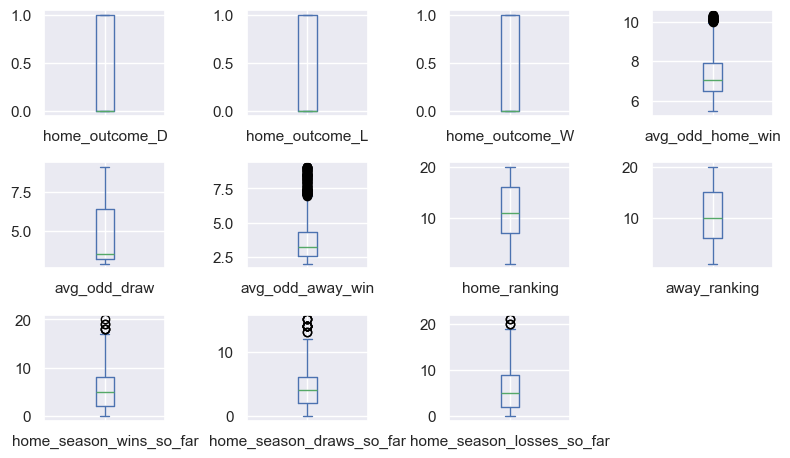

In [157]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(8, 6))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


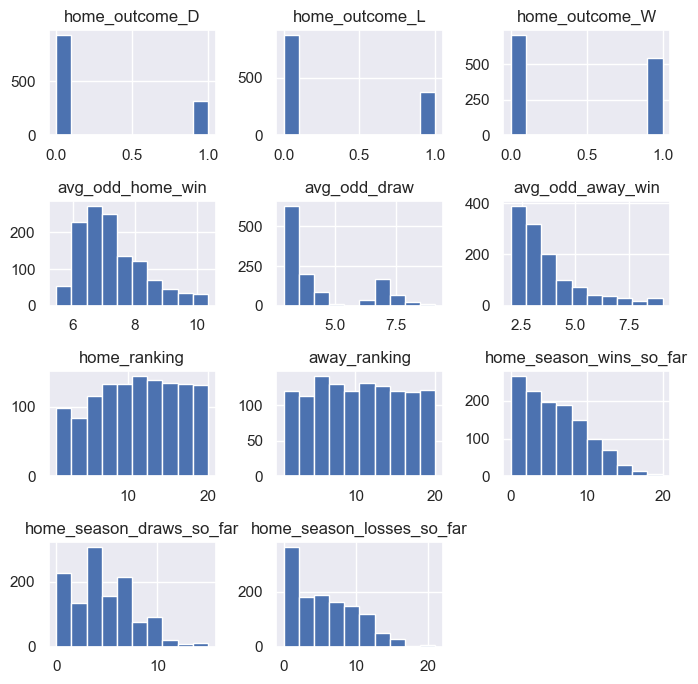

In [ ]:
# Draw histograms
df.hist(figsize=(7, 7))  # Change size as needed (width, height)
plt.tight_layout()         # Prevent label/axis overlap
plt.show()


These diagrams show the distribution of the values in the columns. <br>
One of them seem to have Normal (Gaussian) distribution.<br> 

## Training a model
1. Dividing the dataset into two: training set and test set
2. Implementing Naive Bayes algorithm for training with the training sub-set
3. Estimating how accurate the model is with the test sub-set

#### Explanation:
#### array[:, 1:] → slices all rows, columns from index 1 onward (i.e., columns 1 to 5)

#### array[:, 0] → slices all rows, column 0 only (your target)

In [171]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset

# Convert the dataset into array
array = df.values
# Create two (sub) arrays from it
X = array[:, 3:]   # all columns *except* the first
Y = array[:, 2]    # only the first column (home_outcome)

In [172]:
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [173]:
print(X_test, Y_test)

[[ 7.811  3.207  2.783 ... 11.     5.     7.   ]
 [ 7.448  7.161  2.206 ...  6.     4.     5.   ]
 [ 9.979  8.221  2.231 ...  6.     5.    14.   ]
 ...
 [ 6.872  3.163  3.035 ...  4.     8.    13.   ]
 [ 7.248  7.278  2.179 ...  7.     1.     2.   ]
 [ 8.415  3.478  2.245 ...  6.     6.    12.   ]] [1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 

Now we have training data X_train and Y_train 
and validation data X_test and Y_test 

We are ready to apply algorithms for training a model from our data.
We try Gaussian Naive Bayes, as it is appropriate for analysis of numeric data.

In [174]:
# build the model from the train
model = GaussianNB()

In [175]:
model.fit(X_train, Y_train)

GaussianNB()

In [176]:
# test the model on the test set
model.score(X_test, Y_test)

0.632

In [178]:
model.score(X_train, Y_train)

0.6244979919678715

Now we can try the model on our validation set.

## Validating the Model

In [179]:
X_test

array([[ 7.811,  3.207,  2.783, ..., 11.   ,  5.   ,  7.   ],
       [ 7.448,  7.161,  2.206, ...,  6.   ,  4.   ,  5.   ],
       [ 9.979,  8.221,  2.231, ...,  6.   ,  5.   , 14.   ],
       ...,
       [ 6.872,  3.163,  3.035, ...,  4.   ,  8.   , 13.   ],
       [ 7.248,  7.278,  2.179, ...,  7.   ,  1.   ,  2.   ],
       [ 8.415,  3.478,  2.245, ...,  6.   ,  6.   , 12.   ]])

In [180]:
# Test on the test data, try prediction
predicted = model.predict(X_test)

In [181]:
predicted.shape

(250,)

In [182]:
predicted

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [183]:
Y_test

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1.

### Estimating the Accuracy

We need a metrics for the evaluation. <br>
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [186]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predicted))

0.632


#### Confusion Matrix

Confusion matrix provides an indication of the __three types of predictions__: 
- correct 
- false positive
- false negative.

There are four coeficients, calculated out of these types:
Precission, Recall, Accuracy, and F1 - a harmonic mean of Precission and Recall.


Train Accuracy: 0.62
Test Accuracy: 0.63

Accuracy Score: 0.632

Confusion Matrix:
[[110  43]
 [ 49  48]]


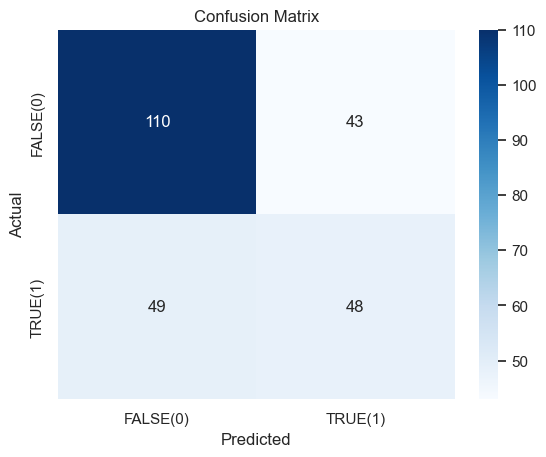


Classifier performance on training dataset:

              precision    recall  f1-score   support

    FALSE(0)       0.64      0.73      0.68       548
     TRUE(1)       0.60      0.50      0.54       448

    accuracy                           0.62       996
   macro avg       0.62      0.61      0.61       996
weighted avg       0.62      0.62      0.62       996


Classifier performance on test dataset:

              precision    recall  f1-score   support

    FALSE(0)       0.69      0.72      0.71       153
     TRUE(1)       0.53      0.49      0.51        97

    accuracy                           0.63       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.63      0.63      0.63       250



In [207]:

# Evaluate model
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
predicted = model.predict(X_test)

# Accuracy
print("\nAccuracy Score:", accuracy_score(Y_test, predicted))

# Confusion matrix
cmat = confusion_matrix(Y_test, predicted)
home_outcome_names = ['FALSE(0)', 'TRUE(1)']

print("\nConfusion Matrix:")
print(cmat)

# Confusion matrix heatmap
sns.set()
sns.heatmap(cmat, annot=True, cmap="Blues", fmt='d',
            xticklabels=home_outcome_names, yticklabels=home_outcome_names)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report provides a breakdown of each home_outcome by precision, recall, f1-score and support
print("\nClassifier performance on training dataset:\n")
print(classification_report(Y_train, model.predict(X_train), target_names=home_outcome_names))

print("\nClassifier performance on test dataset:\n")
print(classification_report(Y_test, predicted, target_names=home_outcome_names))

In [190]:
Y_test

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1.

### Validation with Random Data Samples

In [206]:
# Format:
# [avg_odd_home_win, avg_odd_draw, avg_odd_away_win,
#  home_ranking, away_ranking,
#  home_total_wins_so_far, home_total_draws_so_far, home_total_losses_so_far]

# Test case 1: Strong home team vs. weak away team
example_a = [[1.85, 3.60, 9.0, 2, 19, 20, 3, 0]]
# Expected outcome: likely home win

# Test case 2: Weak home team vs. top away team
example_b = [[20.0, 3.40, 1.70, 18, 1, 3, 4, 12]]
# Expected outcome: likely away win

# Predict and print results
print("Prediction for example A:", model.predict(example_a))
print("Prediction for example B:", model.predict(example_b))


Prediction for example A: [1.]
Prediction for example B: [0.]


In [ ]:
model_file = '../Models/naive-bayes-model-onehot.pkl'

joblib.dump(model, model_file)

['../data/naive-bayes-model.pkl']

In [ ]:
load_model = joblib.load(model_file)
y_predict = load_model.predict(X_test)

Gaussian Naive Bayes makes strong assumptions about normal distribution and feature independence.

My Naive Bayes model predicts WIN and LOSE correctly, but misclassifies the DRAW case as a LOSE. That’s not uncommon for Naive Bayes, especially when:

The features for draws overlap heavily with wins/losses.

Class 1 (draw) has fewer clear patterns or examples compared to 0 or 2.

The features (odds, rankings) don’t allow easy separation of draws in the Gaussian distribution model.

